# Predecir precio de las casas en London

## <span style="color:Blue">1. Descargar los datos</span>

Las bases de datos para este proyecto se puede encontrar en este enlace: https://www.kaggle.com/justinas/housing-in-london

También se pueden consultar todos los datos en GitHub: https://github.com/HugoBrandonHc/MachineLearing_DATA/tree/main/Precio_Casas_London_Practica01


In [583]:
#Importamos nuestras librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [584]:
# Definimos una funcion para extraer los datos
url_año_salario= "https://raw.githubusercontent.com/HugoBrandonHc/MachineLearing_DATA/main/Precio_Casas_London_Practica01/housing_in_london_yearly_variables.csv" 
url_mensual_casa= "https://raw.githubusercontent.com/HugoBrandonHc/MachineLearing_DATA/main/Precio_Casas_London_Practica01/housing_in_london_monthly_variables.csv"

# Definimos nuestras bases de datos
df1 = pd.read_csv(url_año_salario)
df2 = pd.read_csv(url_mensual_casa)

## <span style="color:blue">2. Vistazo a la Base de Datos</span>

In [585]:
#Visualizamos la base 1, de esta solo queremos rescatar las columnas de "median_salary","area","dato"
df1.head()

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,"33,020.00",NaN,48922,0,"6,581.00",NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,"21,480.00",NaN,23620,3,"162,444.00",NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,"19,568.00",NaN,23128,8,"313,469.00",NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,"18,621.00",NaN,21386,18,"217,458.00",NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,"18,532.00",NaN,20911,6,"260,317.00",NaN,NaN,NaN,1


In [586]:
#Filtrar los datos
df1 = df1.filter(items=["median_salary","area","date"])
df1.head()

,median_salary,area,date
0,"33,020.00",city of london,1999-12-01
1,"21,480.00",barking and dagenham,1999-12-01
2,"19,568.00",barnet,1999-12-01
3,"18,621.00",bexley,1999-12-01
4,"18,532.00",brent,1999-12-01


In [587]:
#Del dataframe 2 si queremos usar los datos brindados.
df2.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.00,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.00,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.00,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.00,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.00,NaN,1


In [588]:
#Ahora fusionamos los dos dataframe
data = pd.merge(df1,df2)
data.head()

,median_salary,area,date,average_price,code,houses_sold,no_of_crimes,borough_flag
0,"33,020.00",city of london,1999-12-01,169309,E09000001,97.00,NaN,1
1,"21,480.00",barking and dagenham,1999-12-01,68812,E09000002,267.00,NaN,1
2,"19,568.00",barnet,1999-12-01,149510,E09000003,619.00,NaN,1
3,"18,621.00",bexley,1999-12-01,93905,E09000004,460.00,NaN,1
4,"18,532.00",brent,1999-12-01,123398,E09000005,395.00,NaN,1


In [589]:
#Una vez fusionados obtenemos información de los datos:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 902
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median_salary  881 non-null    float64
 1   area           903 non-null    object 
 2   date           903 non-null    object 
 3   average_price  903 non-null    int64  
 4   code           903 non-null    object 
 5   houses_sold    860 non-null    float64
 6   no_of_crimes   617 non-null    float64
 7   borough_flag   903 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 63.5+ KB


De esta información podemos rescatar el numero de entradas que son 903, luego en la catidad de datos algunas columnas les hace falta datos, esto se considera
para realizar que nuestro futuro modelo realize una buena predicción, también vemos que existen columnas que son de tipo Objeto, vamos a ir resolviendo estos problemas poco a poco

In [590]:
#Una forma muy utilizada para obtener información de nuestros datos numéricos es el método describe()
pd.options.display.float_format = '{:,.2f}'.format #Para poder quitarle la notación cientifica ( demasiados 0)
data.describe()

,median_salary,average_price,houses_sold,no_of_crimes,borough_flag
count,881.00,903.00,860.00,617.00,903.00
mean,"28,789.28","309,916.87","3,853.29","2,038.09",0.77
std,"6,508.32","187,527.43","12,917.66",879.52,0.42
min,"15,684.00","48,298.00",6.00,0.00,0.00
25%,"24,582.00","189,287.00",246.00,"1,542.00",1.00
50%,"28,284.00","260,893.00",351.00,"2,008.00",1.00
75%,"31,589.00","387,597.00",626.00,"2,402.00",1.00
max,"61,636.00","1,364,185.00","119,458.00","7,461.00",1.00


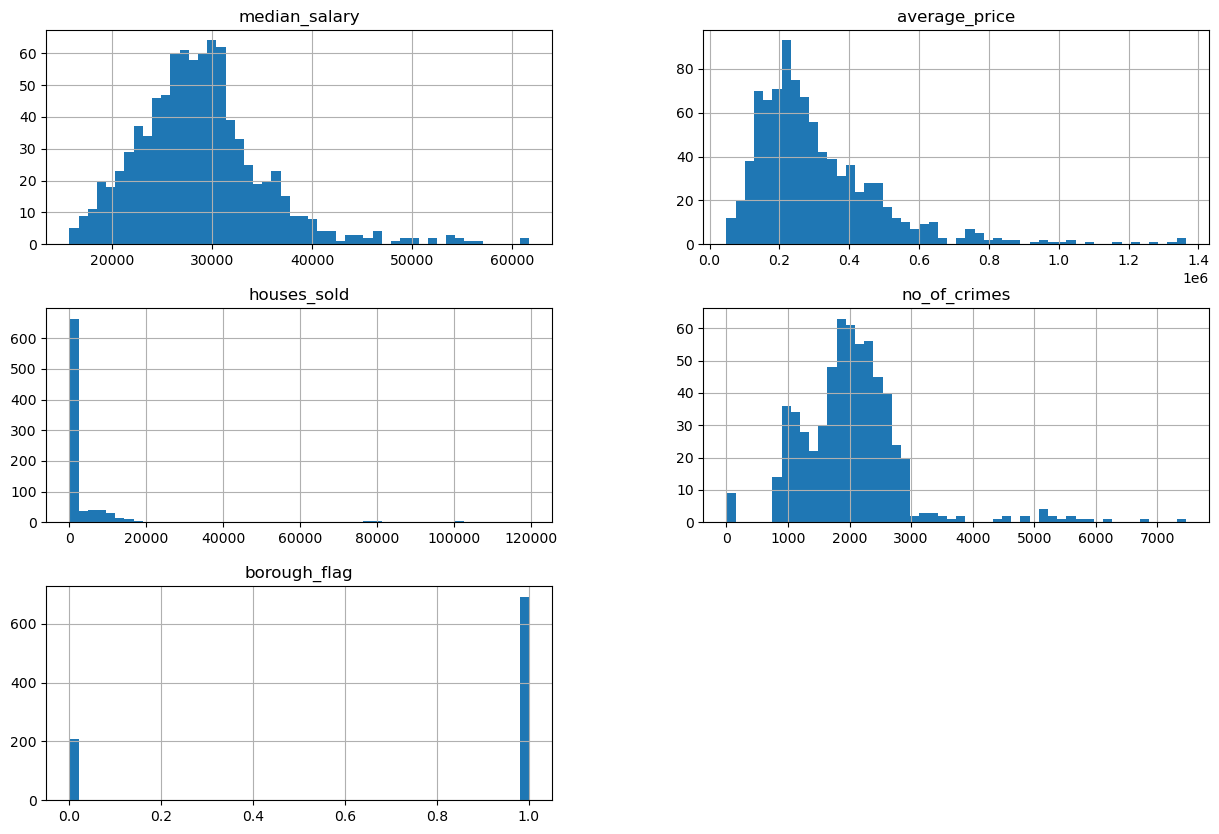

In [591]:
# Realiza un Histograma para visualizar los datos 
data.hist(bins=50,figsize=(15,10))
plt.show()

## <span style="color:blue">4. Medimos correlación</span>

In [592]:
#Creamos matris de correlación
matriz = data.corr(method='pearson')
matriz

C:\Users\Hugo Brandon\AppData\Local\Temp\ipykernel_2200\1187828084.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz = data.corr(method='pearson')


,median_salary,average_price,houses_sold,no_of_crimes,borough_flag
median_salary,1.00,0.64,-0.17,0.15,0.24
average_price,0.64,1.00,-0.19,0.19,0.31
houses_sold,-0.17,-0.19,1.00,0.23,-0.50
no_of_crimes,0.15,0.19,0.23,1.00,NaN
borough_flag,0.24,0.31,-0.50,NaN,1.00


In [593]:
#Comparar correlación de precio promedio
matriz["average_price"].sort_values(ascending=False)

average_price    1.00
median_salary    0.64
borough_flag     0.31
no_of_crimes     0.19
houses_sold     -0.19
Name: average_price, dtype: float64

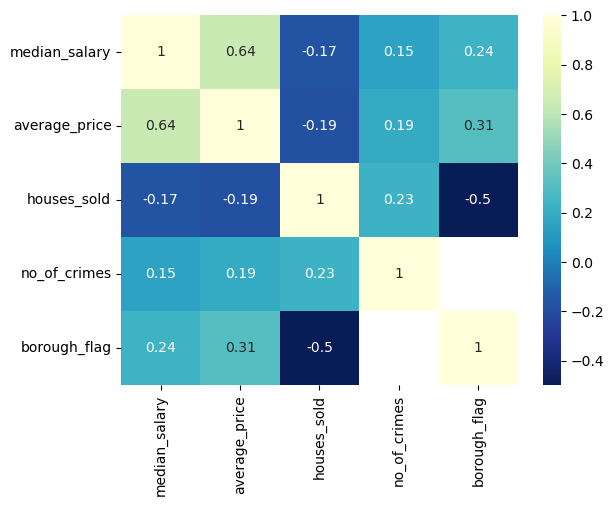

In [594]:
#Vericamos visualmente la correlación
import seaborn as sns

#Creamos un vector
plt = sns.heatmap(matriz,annot=True,cmap="YlGnBu_r")

Mientras mas claro este un color es mayor la correlación, mientras mas oscuro es mas baja.

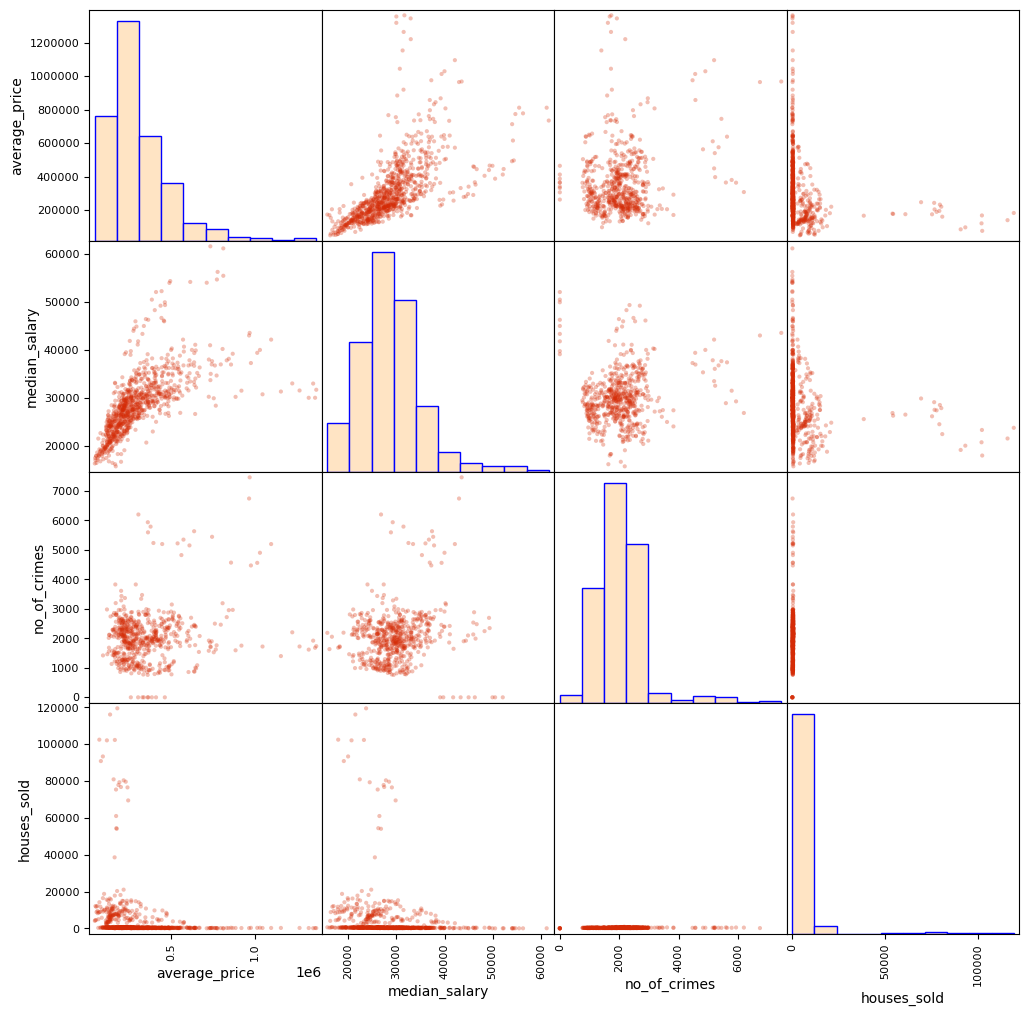

In [595]:
#Para ver mas correlaciones de diferentes formas
#Importar pandas 
from pandas.plotting import scatter_matrix

#Para graficar scatter_matrix...
columns = ['average_price', 'median_salary', 'no_of_crimes', 'houses_sold']
scatter_matrix(data[columns], figsize = (12, 12), color = '#D52B06', alpha = 0.3, 
               hist_kwds = {'color':['bisque'], 'edgecolor': 'blue'});

Con esa grafica podemos destacar la correlación mas fuerte de median_salary con average_price, son nuestros mayores predictores.

<Axes: xlabel='median_salary', ylabel='average_price'>

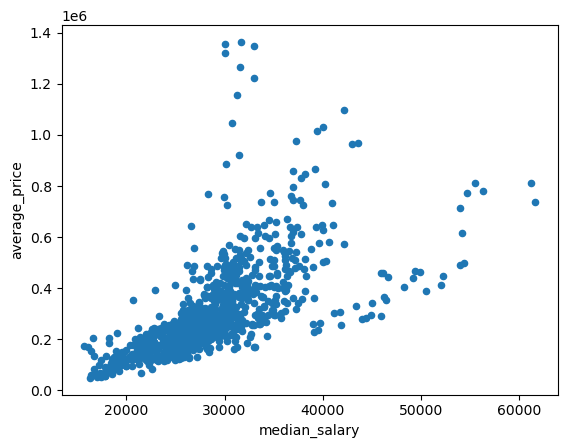

In [596]:
#Para ver una gráfica en específico más a detalle
data.plot(kind="scatter",x="median_salary",y="average_price",alpha=1)

## <span style="color:blue">5. Preparando los datos</span>

In [597]:
data.head()


,median_salary,area,date,average_price,code,houses_sold,no_of_crimes,borough_flag
0,"33,020.00",city of london,1999-12-01,169309,E09000001,97.00,NaN,1
1,"21,480.00",barking and dagenham,1999-12-01,68812,E09000002,267.00,NaN,1
2,"19,568.00",barnet,1999-12-01,149510,E09000003,619.00,NaN,1
3,"18,621.00",bexley,1999-12-01,93905,E09000004,460.00,NaN,1
4,"18,532.00",brent,1999-12-01,123398,E09000005,395.00,NaN,1


In [598]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 902
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median_salary  881 non-null    float64
 1   area           903 non-null    object 
 2   date           903 non-null    object 
 3   average_price  903 non-null    int64  
 4   code           903 non-null    object 
 5   houses_sold    860 non-null    float64
 6   no_of_crimes   617 non-null    float64
 7   borough_flag   903 non-null    int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 63.5+ KB


In [599]:
#verificar cuantos datos faltan
data.isna().sum()

median_salary     22
area               0
date               0
average_price      0
code               0
houses_sold       43
no_of_crimes     286
borough_flag       0
dtype: int64

<Axes: >

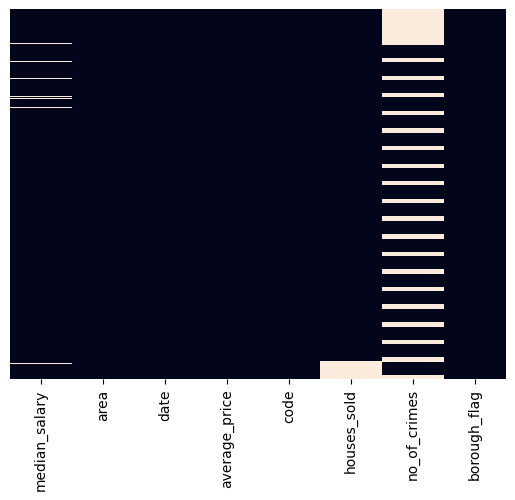

In [600]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [601]:
# Verificamos los valores nulos
data_null = round(100 *(data.isna().sum()/data.shape[0]).sort_values(ascending = False) ,2)
data_null.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
no_of_crimes,31.67
houses_sold,4.76
median_salary,2.44
area,0.00
date,0.00
average_price,0.00
code,0.00
borough_flag,0.00


Remark:
no_of_crimes tiene datos NULL del 30%. Eliminaremos esta columna. ❌❌❌
houses_sold tiene datos NULL < 1%. Podemos reemplazar datos NULL con 'media' según el área.

In [602]:
#Eliminamos la columna no_of_crimes
data_limpia=data.drop(["no_of_crimes"],axis=1)

In [603]:
#Tomamos la media 
median = data_limpia["houses_sold"].median()
# Rellenamos houses_sold con la media
data_limpia["houses_sold"].fillna(median,inplace=True)

In [604]:
#Tomamos la media 
median = data_limpia["median_salary"].median()
# Rellenamos median_salary con la media
data_limpia["median_salary"].fillna(median,inplace=True)

In [606]:
# Verificamos los valores nulos
data_nula= round(100 *(data_limpia.isna().sum()/data_limpia.shape[0]).sort_values(ascending = False) ,2)
data_nula.to_frame(name = 'percent NULL data (%)')

,percent NULL data (%)
median_salary,0.00
area,0.00
date,0.00
average_price,0.00
code,0.00
houses_sold,0.00
borough_flag,0.00


In [607]:
#verificar cuantos datos faltan
data_limpia.isna().sum()

median_salary    0
area             0
date             0
average_price    0
code             0
houses_sold      0
borough_flag     0
dtype: int64

In [608]:
data_limpia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 0 to 902
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   median_salary  903 non-null    float64
 1   area           903 non-null    object 
 2   date           903 non-null    object 
 3   average_price  903 non-null    int64  
 4   code           903 non-null    object 
 5   houses_sold    903 non-null    float64
 6   borough_flag   903 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 56.4+ KB


Como observamos faltan esas cantidad de datos usaremos Scikit para poder rellenar datos  y borrar columnas que no serviran para la prediccion como no_of_crimes, que faltan 286 datos 
es preferible quitarlo.

## <span style="color:blue">6. Convertir variables de texto en numerico </span>

In [609]:
#convertir variables de texto en numericos
data_limpia.head()

,median_salary,area,date,average_price,code,houses_sold,borough_flag
0,"33,020.00",city of london,1999-12-01,169309,E09000001,97.00,1
1,"21,480.00",barking and dagenham,1999-12-01,68812,E09000002,267.00,1
2,"19,568.00",barnet,1999-12-01,149510,E09000003,619.00,1
3,"18,621.00",bexley,1999-12-01,93905,E09000004,460.00,1
4,"18,532.00",brent,1999-12-01,123398,E09000005,395.00,1


In [610]:
#nos desasemos de code y date ya que no son muy sobresalientes para nuestro analisis
data_nueva=data_limpia.drop(["date","code"],axis=1)
data_nueva.head()

,median_salary,area,average_price,houses_sold,borough_flag
0,"33,020.00",city of london,169309,97.00,1
1,"21,480.00",barking and dagenham,68812,267.00,1
2,"19,568.00",barnet,149510,619.00,1
3,"18,621.00",bexley,93905,460.00,1
4,"18,532.00",brent,123398,395.00,1


In [611]:
dummies = pd.get_dummies(data_nueva[["area"]])
dummies

,area_barking and dagenham,area_barnet,area_bexley,area_brent,area_bromley,area_camden,area_city of london,area_croydon,area_ealing,area_east midlands,...,area_richmond upon thames,area_south east,area_south west,area_southwark,area_sutton,area_tower hamlets,area_waltham forest,area_wandsworth,area_west midlands,area_westminster
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
899,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
900,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
901,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [612]:
data_nueva

,median_salary,area,average_price,houses_sold,borough_flag
0,"33,020.00",city of london,169309,97.00,1
1,"21,480.00",barking and dagenham,68812,267.00,1
2,"19,568.00",barnet,149510,619.00,1
3,"18,621.00",bexley,93905,460.00,1
4,"18,532.00",brent,123398,395.00,1
...,...,...,...,...,...
898,"32,120.00",south east,324515,351.00,0
899,"28,654.00",south west,259011,351.00,0
900,"28,284.00",inner london,575511,351.00,0
901,"28,284.00",outer london,424774,351.00,0


In [613]:
concat_data= pd.concat([data_nueva, dummies], axis=1)
concat_data

,median_salary,area,average_price,houses_sold,borough_flag,area_barking and dagenham,area_barnet,area_bexley,area_brent,area_bromley,...,area_richmond upon thames,area_south east,area_south west,area_southwark,area_sutton,area_tower hamlets,area_waltham forest,area_wandsworth,area_west midlands,area_westminster
0,"33,020.00",city of london,169309,97.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"21,480.00",barking and dagenham,68812,267.00,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"19,568.00",barnet,149510,619.00,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"18,621.00",bexley,93905,460.00,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"18,532.00",brent,123398,395.00,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,"32,120.00",south east,324515,351.00,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
899,"28,654.00",south west,259011,351.00,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
900,"28,284.00",inner london,575511,351.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
901,"28,284.00",outer london,424774,351.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [614]:
concat_data= concat_data.drop(["area"],axis=1)
concat_data

,median_salary,average_price,houses_sold,borough_flag,area_barking and dagenham,area_barnet,area_bexley,area_brent,area_bromley,area_camden,...,area_richmond upon thames,area_south east,area_south west,area_southwark,area_sutton,area_tower hamlets,area_waltham forest,area_wandsworth,area_west midlands,area_westminster
0,"33,020.00",169309,97.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"21,480.00",68812,267.00,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"19,568.00",149510,619.00,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"18,621.00",93905,460.00,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"18,532.00",123398,395.00,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
898,"32,120.00",324515,351.00,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
899,"28,654.00",259011,351.00,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
900,"28,284.00",575511,351.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
901,"28,284.00",424774,351.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [615]:
concat_data.isna().sum()

median_salary                  0
average_price                  0
houses_sold                    0
borough_flag                   0
area_barking and dagenham      0
area_barnet                    0
area_bexley                    0
area_brent                     0
area_bromley                   0
area_camden                    0
area_city of london            0
area_croydon                   0
area_ealing                    0
area_east midlands             0
area_enfield                   0
area_england                   0
area_greenwich                 0
area_hackney                   0
area_hammersmith and fulham    0
area_haringey                  0
area_harrow                    0
area_havering                  0
area_hillingdon                0
area_hounslow                  0
area_inner london              0
area_islington                 0
area_kensington and chelsea    0
area_kingston upon thames      0
area_lambeth                   0
area_lewisham                  0
area_londo

## <span style="color:blue">7. Seleccionar y entrenar modelos </span>

In [617]:
x = concat_data.drop("average_price",axis=1)
y = concat_data["average_price"]
from sklearn.model_selection import train_test_split
#Seleccionamos por ejemplo el 20% de los datos para el set de prueba random
X_entrenamiento, X_prueba, Y_entrenamiento, Y_prueba = train_test_split(x,y, test_size=0.2,random_state= 20) #Random_state es la semilla que se usa para generar resultados igual al mio

In [618]:
X_entrenamiento

,median_salary,houses_sold,borough_flag,area_barking and dagenham,area_barnet,area_bexley,area_brent,area_bromley,area_camden,area_city of london,...,area_richmond upon thames,area_south east,area_south west,area_southwark,area_sutton,area_tower hamlets,area_waltham forest,area_wandsworth,area_west midlands,area_westminster
89,"20,217.00",466.00,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,"34,883.00","7,601.00",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206,"19,916.00","16,396.00",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
820,"28,284.00",235.00,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
897,"38,992.00",351.00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,"20,946.00",337.00,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223,"26,722.00",366.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,"24,626.00",309.00,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
474,"28,527.00",121.00,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [619]:
Y_entrenamiento

89     122434
596    313744
206     96223
820    343667
897    481710
        ...  
218    184354
223    246591
271    244594
474    166485
355    301127
Name: average_price, Length: 722, dtype: int64

In [668]:
##Escoger el modelo
##ridge regresion

from sklearn import linear_model
modelo = linear_model.Ridge()
modelo.fit(X_entrenamiento,Y_entrenamiento)

Ridge()

In [670]:
modelo.score(X_prueba,Y_prueba)

0.7564942323576844

In [703]:
#Root Mean Squared Error, RMSE para evaluar el rendimiento de un modelo de aprendizaje automático.
from sklearn.metrics import mean_squared_error

resultados = modelo.predict(X_entrenamiento)
error = mean_squared_error(Y_entrenamiento,resultados)
error = np.sqrt(error)
error

29393.876686198106

In [694]:
rmse.mean()/Y_entrenamiento.mean()


0.310921545765583

In [681]:
##arbol de decisión
from sklearn.tree import DecisionTreeRegressor
reg_arbol = DecisionTreeRegressor()
reg_arbol.fit(X_entrenamiento,Y_entrenamiento)

DecisionTreeRegressor()

In [682]:
reg_arbol.score(X_prueba,Y_prueba)

0.7300020529971532

In [704]:
#Root Mean Squared Error, RMSE para evaluar el rendimiento de un modelo de aprendizaje automático.
from sklearn.metrics import mean_squared_error
resultados = reg_arbol.predict(X_entrenamiento)
error = mean_squared_error(Y_entrenamiento,resultados)
error = np.sqrt(error)
error

0.0

OMG un modelo perfecto, no es como parece el modelo debe tener un sobreajuste.
Hagamos una kfol cross validation, con esto podemos mejorar el sobreajuste:

In [705]:
#Cross Validation El objetivo de la validación cruzada es estimar cómo se comportará un modelo en datos no vistos.
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(reg_arbol,X_entrenamiento,Y_entrenamiento, scoring="neg_mean_squared_error",cv=10)

In [688]:
rmse=np.sqrt(-resultados)
rmse

array([ 89815.88297284,  82268.3045655 , 105567.34367047, 124567.83964042,
        93622.90007896,  87987.47044229, 115828.30470745,  67634.47693197,
        81491.067556  , 117064.28345827])

In [690]:
rmse.mean()/Y_entrenamiento.mean()

0.310921545765583

In [738]:
##RandomFOrestRegresor
from sklearn.ensemble import RandomForestRegressor
modelo_forest =  RandomForestRegressor()
modelo_forest.fit(X_entrenamiento,Y_entrenamiento)

RandomForestRegressor()

In [739]:
modelo_forest.score(X_prueba,Y_prueba)

0.8567747493461302

In [740]:
#Cross Validation El objetivo de la validación cruzada es estimar cómo se comportará un modelo en datos no vistos.
from sklearn.model_selection import cross_val_score
resultados = cross_val_score(modelo_forest,X_entrenamiento,Y_entrenamiento, scoring="neg_mean_squared_error",cv=10)

In [741]:
rmse=np.sqrt(-resultados)
rmse

array([59104.16913566, 76652.35579752, 94624.645321  , 93333.4590568 ,
       83624.37665758, 63646.35213734, 92698.205736  , 57356.3953061 ,
       68218.6596925 , 87880.40024757])

In [742]:
rmse.mean()/Y_entrenamiento.mean()

0.2501732121466217

Se determina que el mejor modelo para este caso es el RandomForestRegressor.........

In [734]:
##Grid Search
from sklearn.model_selection import GridSearchCV
param_grid= [{
    "n_estimators":[3,10,30], "max_features":[2,4,6,8]
}]
grid_search = GridSearchCV(modelo_forest,param_grid,cv=5,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(X_entrenamiento,Y_entrenamiento)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [735]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [736]:
#comprobemos lo que nos menciono el Grid Search
np.sqrt(-grid_search.best_score_)/Y_entrenamiento.mean()

0.25592184946140656

Ni con al ajuste el modelo aun se salva, nos faltarian mas datos para tener un mejor resultado, pero el ganador hasta ahora RandomForestRegressor

In [743]:
#Modelo de prueba

modelo_final = grid_search.best_estimator_
modelo_final

RandomForestRegressor(max_features=2, n_estimators=30)